In [16]:
!rm *.pkl
!wget https://raw.githubusercontent.com/microsoft/AI-For-Beginners/main/data/mnist.pkl.gz
!gzip -d mnist.pkl.gz

'rm' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'gzip' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
from PIL import Image
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import mnist

In [2]:
from PIL import __version__
print(__version__)

9.2.0


In [4]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [6]:
dataset = MNIST(root = 'data/', download=False)

1.7%

100.0%


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


100.0%

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [7]:
print(len(dataset))

test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

60000
60000


Label: 5


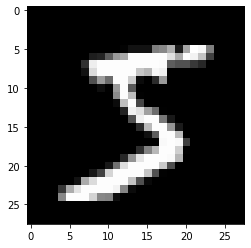

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [15]:
print(type(dataset[0][0]))
dataset[0][0]

<class 'PIL.Image.Image'>


In [12]:
print(np.asarray(dataset[0][0]))

#out
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119   25   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253  150  27   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252  253 187   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 249  253 249  64   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253  253 207   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  39 148 229 253 253 253  250 182   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253 253 201   78   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  23  66 213 253 253 253 253 198  81   2    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18 171 219 253 253 253 253 195  80   9   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  55 172 226 253 253 253 253 244 133  11   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 136 253 253 253 212 135 132  16   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0]]

SyntaxError: invalid syntax (Temp/ipykernel_12724/470386517.py, line 4)

In [13]:
image_data = np.array([[]*len(dataset)])
label_data = np.array([[]*len(dataset)])

for i in range(0,60000):
    image_data[i] = np.asarray(dataset[i][0]).reshape(-1, 28*28)
    label_data[i] = dataset[i][1]

ValueError: could not broadcast input array from shape (784,) into shape (0,)

In [8]:
image_data = []
label_data = []

for i in range(0,60000):
    image_data.append(np.asarray(dataset[i][0]).reshape(-1, 28*28))
    label_data.append(dataset[i][1])

In [9]:
test_data = []
for i in range(0,10000):
    test_data.append(np.asarray(test_dataset[i][0]).reshape(-1, 28*28))

In [10]:
x_train = np.array(image_data).reshape(60000,784)
x_test = np.array(test_data).reshape(10000,784)

In [11]:
x_train = x_train/256
x_test = x_test/256

In [12]:
y_train = np.array(label_data)
print('Y_train: ', y_train)

Y_train:  [5 0 4 ... 5 6 8]


In [13]:
y_test = []

for i in range(0,10000):
    y_test.append(test_dataset[i][1])
    
y_test = np.array(y_test)

In [14]:
algo = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes = (64,64))

algo.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64))

In [15]:
prediction = algo.predict(x_test)

In [16]:
accuracy = confusion_matrix(y_test, prediction)
print(accuracy) #matrix operation

[[ 966    0    0    0    2    1    7    1    2    1]
 [   0 1124    2    1    0    0    2    1    5    0]
 [   3    1 1010    4    2    0    1    7    4    0]
 [   1    0    3  980    1    9    0    4    7    5]
 [   2    1    3    1  956    0    4    2    0   13]
 [   1    0    0    8    1  868    6    0    5    3]
 [   3    2    1    1    3    6  940    0    2    0]
 [   0    3   12    2    2    0    0 1001    1    7]
 [   2    0    2    9    4    4    2    5  942    4]
 [   1    3    0    4    8    8    0    9    4  972]]


In [17]:
def accura(con_matrix):
    return con_matrix.trace()/con_matrix.sum()

In [18]:
print(accura(accuracy))

0.9759


In [37]:
img = Image.open('7.png').resize((28,28)) #add resize()

# data = asarray(image)
img_data = np.array(list(img.getdata())) #change to data
# raw data

input_data = img_data[:,0].reshape(1, -1)

In [38]:
prediction = algo.predict(input_data)
print(prediction)

[5]


[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


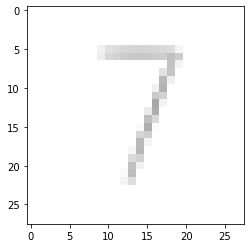

In [39]:
img = Image.open('7.png').resize((28,28))
plt.imshow(img, cmap='gray')
img_data = np.array(list(img.getdata()))
print(img_data)